## **VISÃO COMPUTACIONAL - AULA 15**

**Objetivos da aula:**

*   apresentar e praticar com o algoritmo de detecção de features FAST
*   apresentar e praticar com o algoritmo de obtenção de descritores BRIEF



**CORRESPONDÊNCIAS DE FEATURES**

Na última aula, aprendemos que duas features são **correpondentes** se possuem **características semelhantes** (cor, textura, etc). A obtenção de correspondêcias entre features é conhecida como **homografia**. Por exemplo, queremos saber qual a correspondência entre o espaço de busca (imagem) e um padrão desejado (almofada).



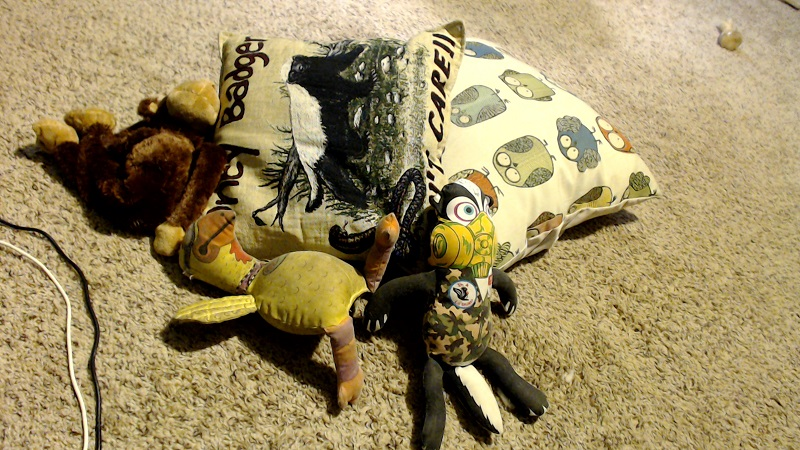

In [14]:
imagem = cv.imread('image-homografia.jpg')
cv2_imshow(imagem)

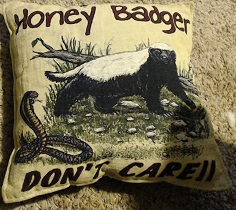

In [15]:
imagem = cv.imread('image-template-homografia.jpg')
cv2_imshow(imagem)

Para obter as correspondências, utilizamos o algoritmo ORB (Oriented FAST and Rotated BRIEF). Este algoritmo utiliza dois algoritmos - FAST e BRIEF -, que estudaremos em detalhes na aula de hoje.

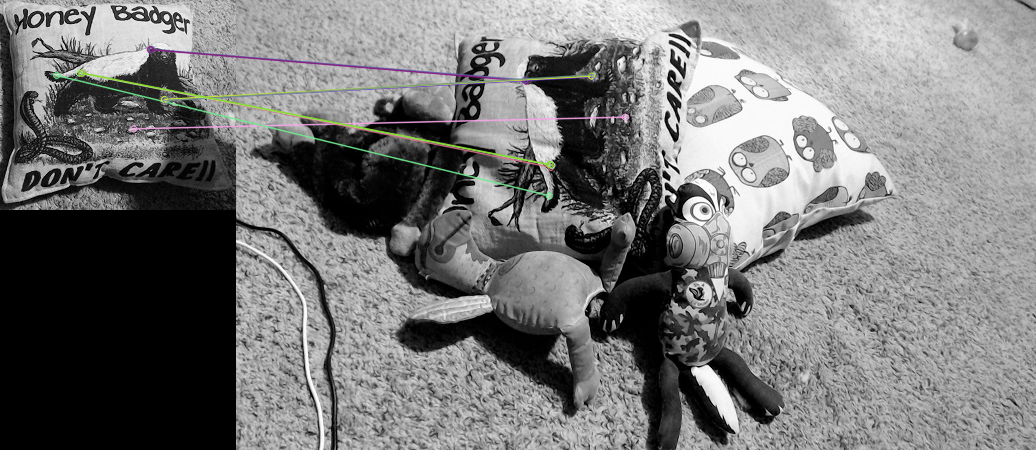

In [16]:
img1 = cv.imread('image-template-homografia.jpg',0)
img2 = cv.imread('image-homografia.jpg',0)
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
cv2_imshow(img3)

#### **ALGORITMO FAST**

Features from Accelerated Segment Test (FAST) é um método de detecção de features, que pode ser usado para extrair pontos de features e, posteriormente, para rastrear e mapear objetos em muitas tarefas de Visão Computacional. O detector de corners FAST foi originalmente desenvolvido por Edward Rosten e Tom Drummond e foi publicado em 2006. 

A vantagem mais promissora do detector de corners FAST é sua eficiência computacional. Referindo-se ao seu nome, é de fato mais rápido do que muitos outros métodos de extração de features bem conhecidos, como diferença de Gaussianas (DoG) usado pelos detectores SIFT, SUSAN e Harris. Além disso, quando técnicas de **Aprendizado de Máquina** são aplicadas, um desempenho superior em termos de tempo de computação e recursos pode ser obtido. O detector de features FAST é muito adequado para aplicações de processamento de vídeo em tempo real devido a seu ao desempenho.

O detector de features FAST usa um círculo de 16 pixels (um círculo de Bresenham de raio 3) para classificar se um ponto candidato p é realmente uma feature. Cada pixel do círculo é rotulado do número inteiro 1 a 16 no sentido horário. 

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/FAST_Corner_Detector.jpg/440px-FAST_Corner_Detector.jpg'> </img>

Se um conjunto de N pixels contíguos no círculo são todos mais brilhantes do que a intensidade do pixel candidato p (denotado por Ip) mais um valor de limiar t ou todos mais escuros que a intensidade do pixel candidato p menos o valor de limiar t, então p é classificado como feature. 



As condições podem ser escritas como:

<ul>
<li> <b>Condição 1</b>: Um conjunto de N pixels contíguos $S$, $\forall x\in S$, a intensidade de  x > Ip + threshold, ou  $I_{x}>I_{p}+t$.
<li> <b>Condição 2</b>: Um conjunto de N pixels contíguos $S$, $\forall x\in S$, $I_{x}<I_{p}-t$.
</ul>

Portanto, quando qualquer uma das duas condições é atendida, o candidato p pode ser classificado como uma feature. Há um tradeoff de escolher N, o número de pixels contíguos e o valor limite t. Por um lado, o número de pontos de canto detectados não deve ser muito, por outro lado, o alto desempenho não deve ser alcançado sacrificando a eficiência computacional. Sem o aprimoramento do **Aprendizado de Máquina**, N é geralmente escolhido como 12. Um método de teste de alta velocidade pode ser aplicado para excluir pontos que não sejam features.

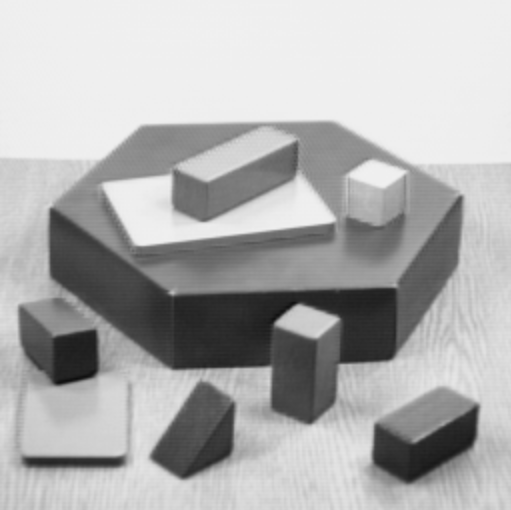

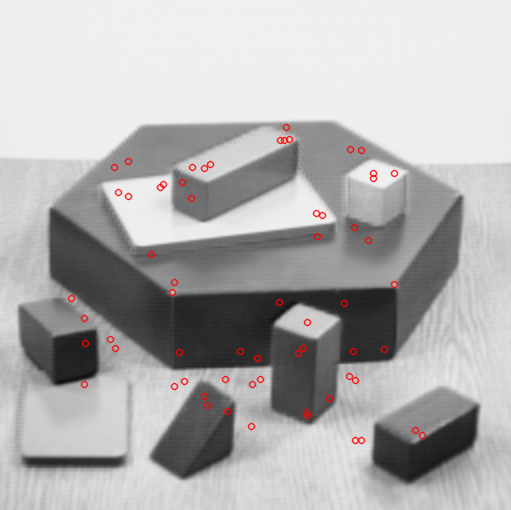

In [5]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.imread('objects.png',0)
cv2_imshow(img)
# Inicializa o algoritmo FAST com valores default
fast = cv.xfeatures2d.StarDetector_create()
# Detecção dos keypoints
kp = fast.detect(img,None)
# Desenho dos keypoints
img=cv.drawKeypoints(img,kp,np.array([]),(0, 0, 255))
cv2_imshow(img)


**EXERCÍCIO**

Aplique a implementação do Algoritmo FAST na imagem abaixo:

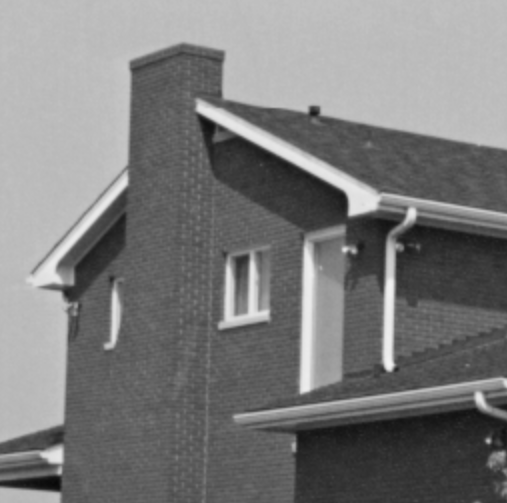

In [6]:
img = cv.imread('house.png',0)
cv2_imshow(img)
#Proponha sua implementação a partir deste ponto...

**EXERCÍCIO**

Por padrão, o construtor do detector FAST possui os seguintes parâmetros:

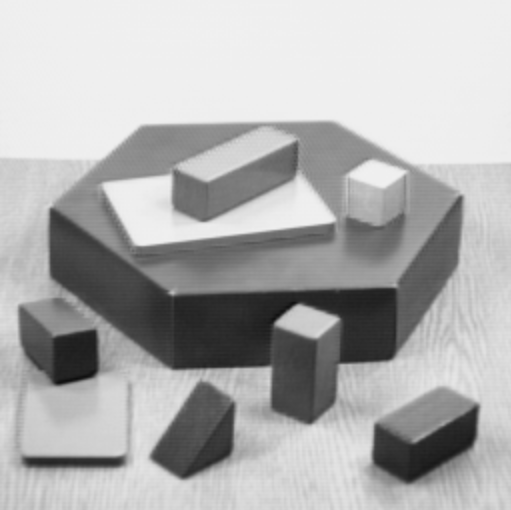

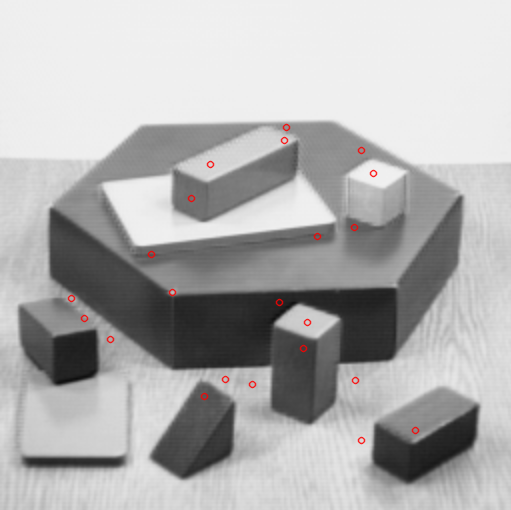

In [8]:
img = cv.imread('objects.png',0)
cv2_imshow(img)
# Inicializa o algoritmo FAST com valores default
fast = cv.xfeatures2d.StarDetector_create(maxSize = 45,responseThreshold = 30,lineThresholdProjected = 10,lineThresholdBinarized = 8, suppressNonmaxSize = 5)
# Detecção dos keypoints
kp = fast.detect(img,None)
# Desenho dos keypoints
img=cv.drawKeypoints(img,kp,np.array([]),(0, 0, 255))
cv2_imshow(img)


Faça diversos experimentos alterando os valores destes parâmetros e observe os resultados.

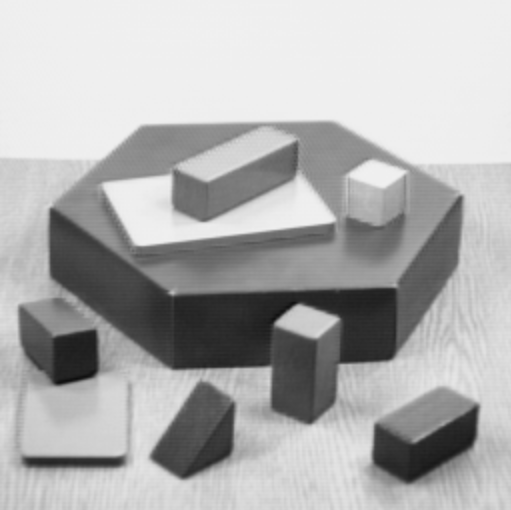

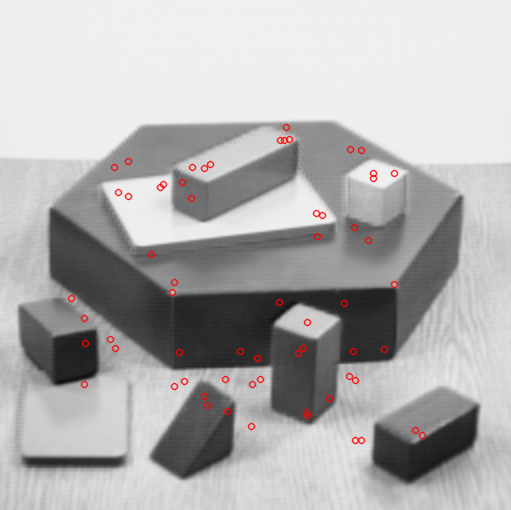

In [9]:
img = cv.imread('objects.png',0)
cv2_imshow(img)
# Inicializa o algoritmo FAST com valores default
fast = cv.xfeatures2d.StarDetector_create(maxSize = 45,responseThreshold = 30,lineThresholdProjected = 10,lineThresholdBinarized = 8, suppressNonmaxSize = 5)
# Detecção dos keypoints
kp = fast.detect(img,None)
# Desenho dos keypoints
img=cv.drawKeypoints(img,kp,np.array([]),(0, 0, 255))
cv2_imshow(img)

**EXERCÍCIO**

Observando a imagem, que tipo de features poderiam ser detectadas com o algoritmo FAST ? 

*Digite sua resposta aqui*....

#### **ALGORITMO BRIEF**

Uma vez que tenhamos detectado os pontos-chave (keypoints) relativos a features dentro de uma imagem, podemos obter sua descrição (propriedades geométricas, por exemplo) através do Algoritmo BRIEF.

BRIEF converte pequenas regiões de imagem (regiões de features, por exemplo) em um vetor binário de features, chamado **descritor binário de features**. Normalmente, cada ponto-chave (calculado pelo algoritmo FAST, por exemplo) é descrito por um string binário.


In [12]:
img = cv.imread('objects.png',0)
# Inicializa o motor do FAST
fast = cv.xfeatures2d.StarDetector_create()
# Inicializa op extrator BRIEF
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
# Encontra os keypoints pel BRIEF
kp = fast.detect(img,None)
# Obtém as anotações de cada ponto, utiliza esta informação.
kp, des = brief.compute(img, kp)
print( brief.descriptorSize(), "keypoints" )
for i in kp:
  print(i.pt)
print('Dimensões do Vetor-Descritor:', des.shape)
print('Primeiro descritor:', des[0], 'associado ao keypoint',kp[0].pt)

32 keypoints
(286.0, 127.0)
(280.0, 140.0)
(284.0, 140.0)
(289.0, 139.0)
(350.0, 149.0)
(361.0, 150.0)
(128.0, 161.0)
(210.0, 164.0)
(114.0, 167.0)
(192.0, 167.0)
(204.0, 168.0)
(373.0, 173.0)
(394.0, 173.0)
(373.0, 178.0)
(182.0, 182.0)
(163.0, 184.0)
(160.0, 187.0)
(118.0, 192.0)
(128.0, 196.0)
(191.0, 198.0)
(316.0, 213.0)
(322.0, 215.0)
(354.0, 227.0)
(317.0, 236.0)
(368.0, 240.0)
(151.0, 254.0)
(174.0, 282.0)
(394.0, 284.0)
(172.0, 292.0)
(71.0, 298.0)
(279.0, 302.0)
(344.0, 303.0)
(84.0, 318.0)
(307.0, 322.0)
(110.0, 339.0)
(85.0, 343.0)
(115.0, 348.0)
(303.0, 348.0)
(384.0, 349.0)
(179.0, 352.0)
(240.0, 351.0)
(298.0, 353.0)
(353.0, 351.0)
(257.0, 358.0)
(349.0, 376.0)
(225.0, 379.0)
(260.0, 379.0)
(355.0, 380.0)
(184.0, 381.0)
(84.0, 384.0)
(174.0, 386.0)
(252.0, 384.0)
(204.0, 396.0)
(329.0, 398.0)
(207.0, 405.0)
(227.0, 411.0)
(306.0, 412.0)
(307.0, 415.0)
(251.0, 426.0)
(415.0, 430.0)
(422.0, 435.0)
(355.0, 440.0)
(361.0, 440.0)
Dimensões do Vetor-Descritor: (63, 32)
Primeir

**EXERCÍCIO**

Abaixo, temos a documentação da classe KeyPoint, que representa o descritor de um ponto.

https://docs.opencv.org/3.4/d2/d29/classcv_1_1KeyPoint.html

Com base nesta documentação, mostre as principais informações associadas a um keypoint em seu descritor.


In [ ]:
#implemente seu código aqui...

**EXERCÍCIO**

Obtenha os descritores dos keypoints da imagem abaixo e mostre suas informações:

In [ ]:
img = cv.imread('objects.png',0)
cv2_imshow(img)
#implemente sua solução a partir daqui...

#### **REFERÊNCIAS**

Ethan Rublee, Vincent Rabaud, Kurt Konolige, Gary R. Bradski. **ORB: An efficient alternative to SIFT or SURF**. ICCV 2011: 2564-2571.

Edward Rosten and Tom Drummond. **Machine learning for high speed corner detection**. 9th European Conference on Computer Vision, vol. 1, 2006, pp. 430–443.

Edward Rosten, Reid Porter, and Tom Drummond. **Faster and better: a machine learning approach to corner detection**. IEEE Trans. Pattern Analysis and Machine Intelligence, 2010, vol 32, pp. 105-119.

Michael Calonder, Vincent Lepetit, Christoph Strecha, and Pascal Fua. **BRIEF: Binary Robust Independent Elementary Features.** 11th European Conference on Computer Vision (ECCV), Heraklion, Crete. LNCS Springer, September 2010.

